In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("azd.csv")
num_rows = data.shape[0]
data.head()

,priceDate,itemName,state,mandiName,arrivals,unitArrivals,variety,minPrice,maxPrice,modalPrice,priceUnit
0,2005-04-11,Potato,NCT of Delhi,Azadpur,106.0,Tonnes,F.A.Q.,300.0,663.0,475.0,Rs/Quintal
1,2005-04-12,Potato,NCT of Delhi,Azadpur,1745.0,Tonnes,F.A.Q.,325.0,688.0,500.0,Rs/Quintal
2,2005-04-13,Potato,NCT of Delhi,Azadpur,1233.0,Tonnes,F.A.Q.,300.0,688.0,488.0,Rs/Quintal
3,2005-04-16,Potato,NCT of Delhi,Azadpur,1654.0,Tonnes,F.A.Q.,350.0,650.0,475.0,Rs/Quintal
4,2005-04-18,Potato,NCT of Delhi,Azadpur,26.0,Tonnes,F.A.Q.,350.0,650.0,475.0,Rs/Quintal


In [3]:
data.describe()

,arrivals,minPrice,maxPrice,modalPrice
count,3778.000000,3804.000000,3804.000000,3795.000000
mean,1169.233086,511.487382,1185.697687,812.674572
std,681.258005,288.991695,706.298731,417.013277
min,0.100000,60.000000,275.000000,198.000000
25%,883.700000,300.000000,700.000000,500.000000
50%,1277.750000,438.000000,1031.000000,700.000000
75%,1569.700000,625.000000,1500.000000,991.000000
max,11984.200000,2100.000000,20580.000000,4060.000000


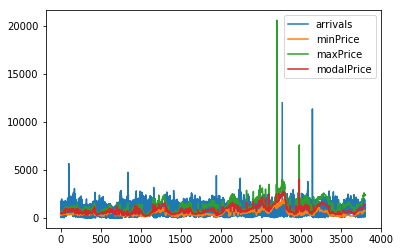

In [4]:
data.plot()
plt.show()

In [5]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

X = pd.read_csv('azd.csv')
X = X.iloc[:, 7]
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [6]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

In [7]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # The dataset has values for approx 292 days a year
    days = 365
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    # predictions
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days)
    predictions.append(yhat)
    
    obs = test[i+1902]
    history.append(obs)
    print('%d: Predicted=%.3f, Expected=%3.f' % (i,yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

   

0: Predicted=318.697, Expected=375
1: Predicted=215.812, Expected=320
2: Predicted=371.369, Expected=320
3: Predicted=236.976, Expected=320
4: Predicted=268.799, Expected=300
5: Predicted=281.311, Expected=280
6: Predicted=280.973, Expected=320
7: Predicted=296.036, Expected=300
8: Predicted=297.790, Expected=300
9: Predicted=298.664, Expected=300
10: Predicted=299.192, Expected=360
11: Predicted=322.667, Expected=340
12: Predicted=354.714, Expected=340
13: Predicted=512.129, Expected=320
14: Predicted=437.845, Expected=320
15: Predicted=453.229, Expected=360
16: Predicted=341.363, Expected=280
17: Predicted=296.932, Expected=260
18: Predicted=282.182, Expected=260
19: Predicted=273.325, Expected=260
20: Predicted=288.009, Expected=200
21: Predicted=253.661, Expected=200
22: Predicted=232.200, Expected=200
23: Predicted=294.303, Expected=200
24: Predicted=182.289, Expected=200
25: Predicted=201.551, Expected=200
26: Predicted=201.076, Expected=250
27: Predicted=220.126, Expected=200
28

/home/vishal/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1079: Predicted=708.938, Expected=438
1080: Predicted=600.645, Expected=400
1081: Predicted=582.770, Expected=400
1082: Predicted=510.640, Expected=360
1083: Predicted=451.367, Expected=400
1084: Predicted=433.756, Expected=400
1085: Predicted=420.875, Expected=400
1086: Predicted=372.921, Expected=400
1087: Predicted=385.180, Expected=400
1088: Predicted=390.810, Expected=400
1089: Predicted=454.299, Expected=400
1090: Predicted=430.742, Expected=350
1091: Predicted=397.627, Expected=350
1092: Predicted=419.534, Expected=400
1093: Predicted=412.603, Expected=300
1094: Predicted=364.886, Expected=300
1095: Predicted=340.174, Expected=300
1096: Predicted=324.860, Expected=300
1097: Predicted=475.381, Expected=300
1098: Predicted=400.741, Expected=280
1099: Predicted=353.534, Expected=300
1100: Predicted=293.937, Expected=300
1101: Predicted=338.167, Expected=400
1102: Predicted=364.729, Expected=350
1103: Predicted=396.693, Expected=350
1104: Predicted=376.922, Expected=600
1105: Predic

In [8]:
residuals = [test[i+1902]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.describe()

,0
count,1903.000000
mean,0.515203
std,118.138674
min,-1064.574396
25%,-43.440850
50%,-0.762725
75%,41.360134
max,1104.150521


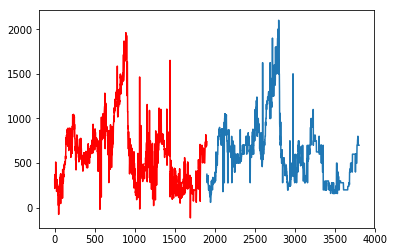

In [12]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [14]:
X = pd.read_csv('azd.csv')
X = X.iloc[:, 8]
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
maxPrice = list()
# Corrected predictions for maxPrice

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # The dataset has values for approx 292 days a year
    days = 292
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    # predictions - rolling forecast
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days)
    predictions.append(yhat)
    minPrice.append(yhat)
    
    obs = test[i+1902]
    history.append(obs)
    print('%d: Predicted=%.3f, Expected=%3.f' % (i,yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

for i in range(30):
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days)
    maxPrice.append(yhat)
   

0: Predicted=1448.416, Expected=1400
1: Predicted=1424.087, Expected=1400
2: Predicted=1416.345, Expected=1500
3: Predicted=1550.238, Expected=1500
4: Predicted=1527.089, Expected=1500
5: Predicted=1518.381, Expected=1500
6: Predicted=1512.474, Expected=1400
7: Predicted=1429.318, Expected=1500
8: Predicted=1461.837, Expected=1400
9: Predicted=1434.968, Expected=1400
10: Predicted=1423.723, Expected=1800
11: Predicted=1312.580, Expected=1600
12: Predicted=1172.443, Expected=1600
13: Predicted=1764.945, Expected=1563
14: Predicted=1165.224, Expected=1375
15: Predicted=1355.551, Expected=1200
16: Predicted=1186.055, Expected=1125
17: Predicted=1418.041, Expected=960
18: Predicted=941.088, Expected=960
19: Predicted=1518.685, Expected=1000
20: Predicted=752.987, Expected=1100
21: Predicted=910.624, Expected=1100
22: Predicted=972.235, Expected=1000
23: Predicted=836.119, Expected=1100
24: Predicted=897.605, Expected=1400
25: Predicted=1123.889, Expected=900
26: Predicted=933.117, Expected

In [15]:
residuals_max = [test[i+1902]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.describe()

,0
count,1903.000000
mean,0.515203
std,118.138674
min,-1064.574396
25%,-43.440850
50%,-0.762725
75%,41.360134
max,1104.150521


In [16]:
X = pd.read_csv('azd.csv')
X = X.iloc[:, 9]
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
modalPrice = list()
# Corrected predictions for modalPrice

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # The dataset has values for approx 292 days a year
    days = 292
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    # predictions - rolling forecast
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days)
    predictions.append(yhat)
    minPrice.append(yhat)
    
    obs = test[i+1902]
    history.append(obs)
    print('%d: Predicted=%.3f, Expected=%3.f' % (i,yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

for i in range(30):
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days)
    modalPrice.append(yhat)
   

0: Predicted=926.159, Expected=853
1: Predicted=940.498, Expected=864
2: Predicted=513.299, Expected=876
3: Predicted=1078.015, Expected=876
4: Predicted=979.272, Expected=868
5: Predicted=811.763, Expected=861
6: Predicted=830.254, Expected=866
7: Predicted=842.279, Expected=874
8: Predicted=713.181, Expected=881
9: Predicted=816.374, Expected=881
10: Predicted=821.869, Expected=1051
11: Predicted=924.563, Expected=970
12: Predicted=843.488, Expected=1016
13: Predicted=976.386, Expected=979
14: Predicted=951.319, Expected=861
15: Predicted=834.664, Expected=743
16: Predicted=799.700, Expected=800
17: Predicted=859.356, Expected=630
18: Predicted=689.066, Expected=645
19: Predicted=667.177, Expected=633
20: Predicted=663.630, Expected=660
21: Predicted=665.342, Expected=715
22: Predicted=685.231, Expected=680
23: Predicted=671.513, Expected=730
24: Predicted=599.245, Expected=844
25: Predicted=626.574, Expected=568
26: Predicted=643.961, Expected=566
27: Predicted=597.187, Expected=534

In [17]:
residuals_max = [test[i+1902]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.describe()

,0
count,1903.000000
mean,0.515203
std,118.138674
min,-1064.574396
25%,-43.440850
50%,-0.762725
75%,41.360134
max,1104.150521


In [18]:
from datetime import datetime, timedelta, date
var = list()
temp1 = datetime.strptime('2018-09-01', '%Y-%m-%d').date()
for i in range(30):
    var.append(temp1.strftime('%Y-%m-%d'))
    temp1 = temp1 + timedelta(1)

In [25]:
import csv
v = open('result.csv', 'w')
w = csv.writer(v)
w.writerow(['priceDate', 'minPrice', 'maxPrice', 'modalPrice'])
for i in range(len(var)):
    w.writerow([var[i], minPrice[i][0], maxPrice[i][0], modalPrice[i][0]])

data = pd.read_csv('result.csv')
data.head()

,priceDate,minPrice,maxPrice,modalPrice
0,2018-09-01,1448.416337,2418.501852,1437.147295
1,2018-09-02,1424.087143,2418.501852,1437.147295
2,2018-09-03,1416.344732,2418.501852,1437.147295
3,2018-09-04,1550.238325,2418.501852,1437.147295
4,2018-09-05,1527.088803,2418.501852,1437.147295


In [26]:
data

,priceDate,minPrice,maxPrice,modalPrice
0,2018-09-01,1448.416337,2418.501852,1437.147295
1,2018-09-02,1424.087143,2418.501852,1437.147295
2,2018-09-03,1416.344732,2418.501852,1437.147295
3,2018-09-04,1550.238325,2418.501852,1437.147295
4,2018-09-05,1527.088803,2418.501852,1437.147295
5,2018-09-06,1518.381462,2418.501852,1437.147295
6,2018-09-07,1512.473775,2418.501852,1437.147295
7,2018-09-08,1429.317565,2418.501852,1437.147295
8,2018-09-09,1461.837084,2418.501852,1437.147295
9,2018-09-10,1434.968188,2418.501852,1437.147295
